## Paediatric traumatic brain injury as a risk factor for psychosis and psychotic symptoms: a systematic review and meta-analysis

In [50]:
# Load R packages
library(meta)
library(dplyr)
library(dmetar) 

# Note: the dmetar package is not available on CRAN.
# Install instructions from github here: https://dmetar.protectlab.org/

Read file with extracted data for meta-analysis

In [51]:
pTBI_psychosis_meta_datafile <- "/home/main/data/Yau_et_al_pTBI_psychosis_data.csv"
pTBI_psychosis_meta_df <- read.csv(pTBI_psychosis_meta_datafile, header = TRUE)

Remove rows with missing data for Exposure_Events (makes the forest plot easier to read)

In [52]:
pTBI_psychosis_meta_df <- pTBI_psychosis_meta_df %>%
  filter_at(vars(Exposure_Events), all_vars(!is.na(.)))

#### Calculate meta-analysis for entire sample of studies

In [53]:
pTBI_psychosis_meta_overall <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                       studlab = Study, 
                                       label.e = "pTBI", label.c = "Control",
                                       fixed = FALSE, random = TRUE,
                                       method.tau = "PM", prediction = TRUE,
                                       incr = 0.1, sm = "OR",           
                                       data = pTBI_psychosis_meta_df)

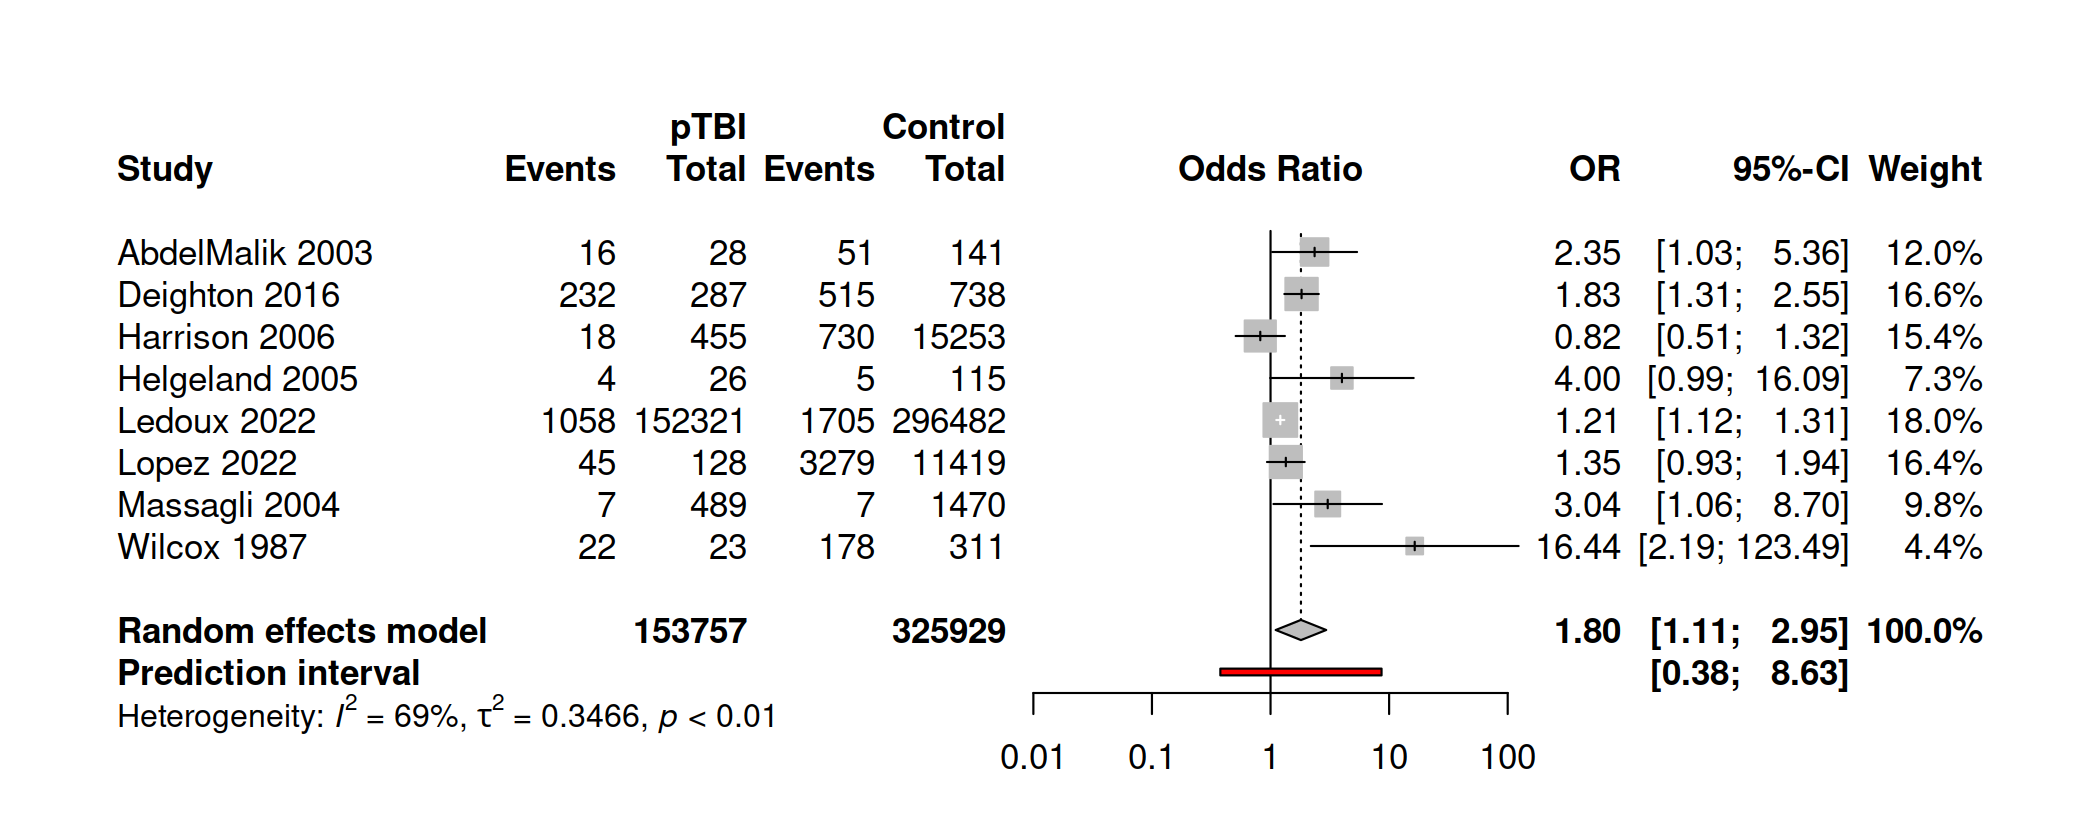

In [54]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res = 210)
forest(pTBI_psychosis_meta_overall)

#### Subgroup analysis for location of study

In [55]:
pTBI_psychosis_meta_location <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                        studlab = Study, 
                                        label.e = "pTBI", label.c = "Control",
                                        fixed = FALSE, random = TRUE,
                                        method.tau = "PM", prediction = TRUE,
                                        incr = 0.1, sm = "OR",
                                        subgroup = Location_Bin,
                                        data = pTBI_psychosis_meta_df)

Forest plot

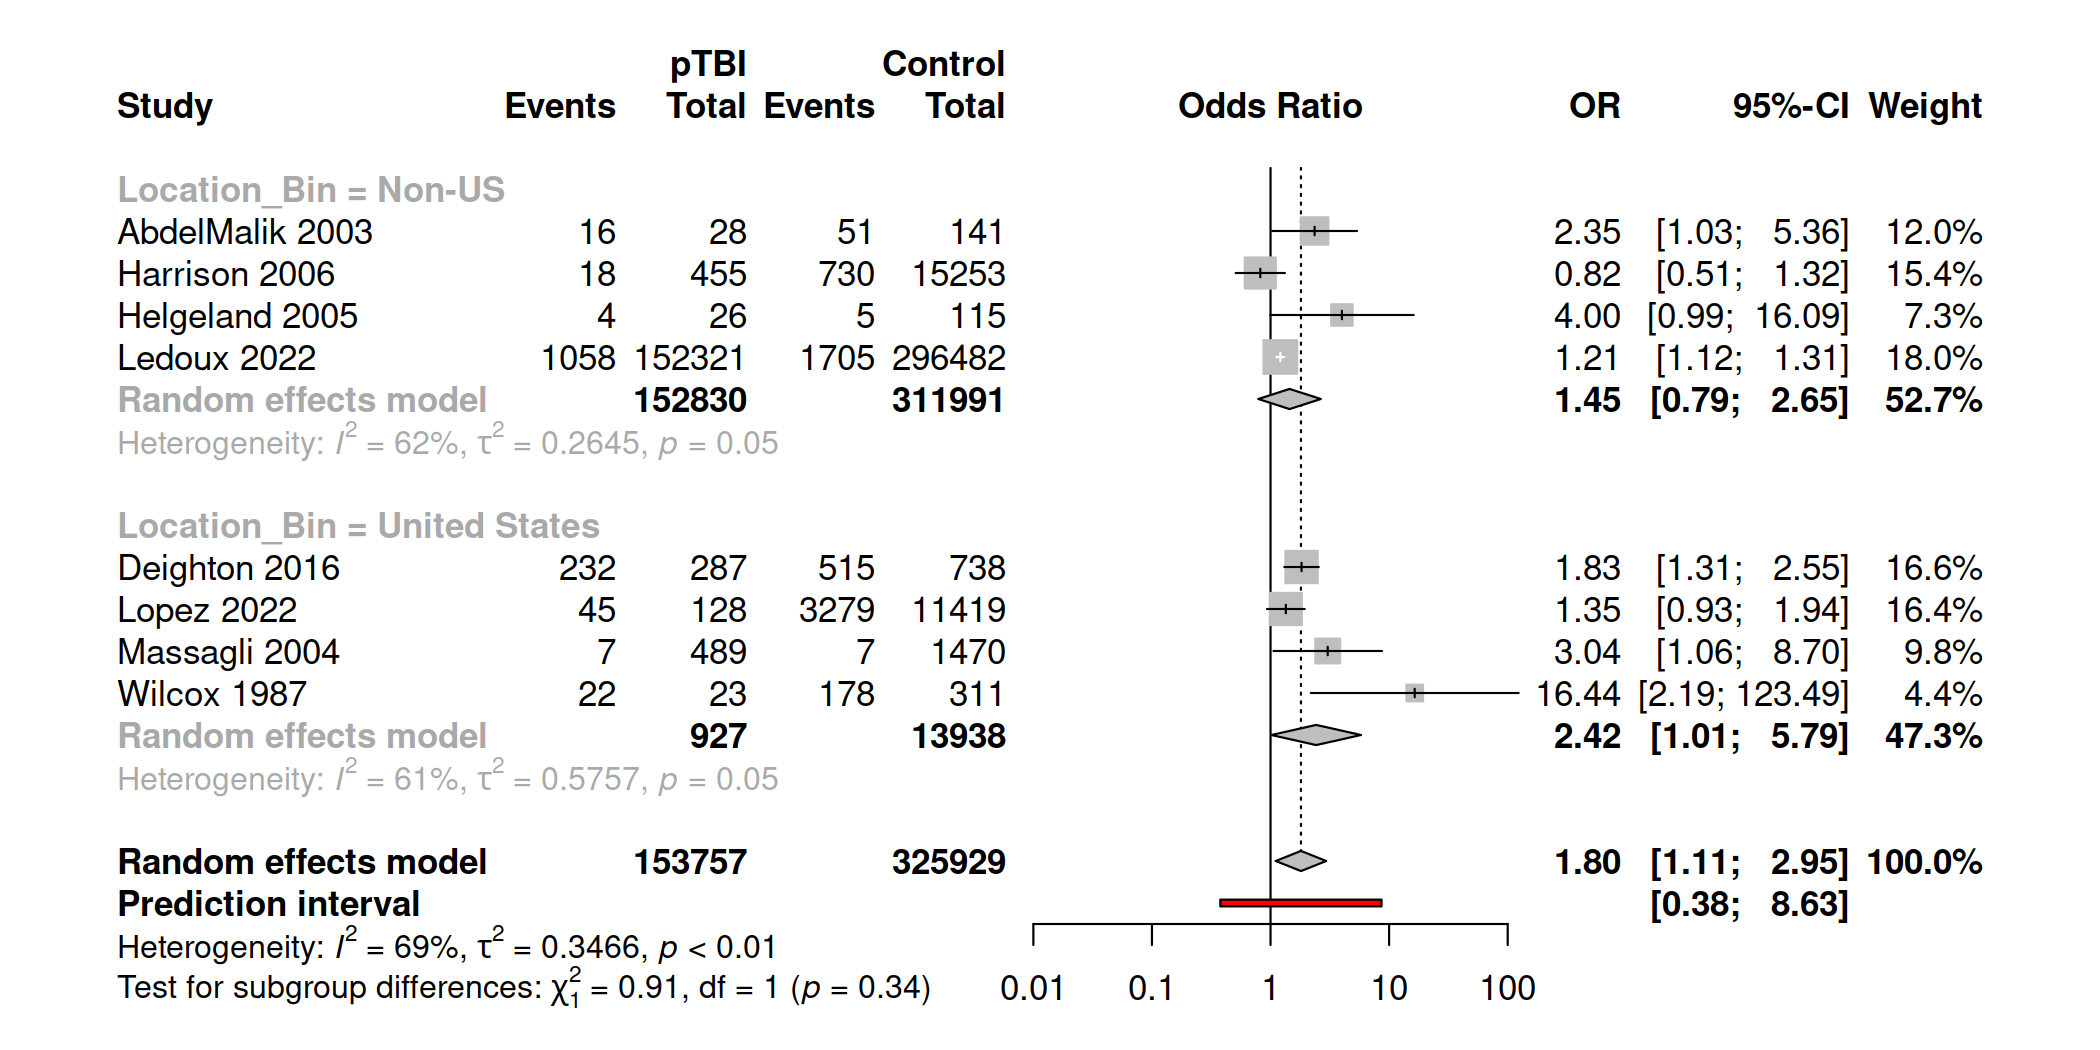

In [56]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_location)

#### Subgroup analysis for design of study

In [57]:
pTBI_psychosis_meta_design <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                      studlab = Study, 
                                      label.e = "pTBI", label.c = "Control",
                                      fixed = FALSE, random = TRUE,
                                      method.tau = "PM", prediction = TRUE,
                                      incr = 0.1, sm = "OR",
                                      subgroup = Design_Bin,
                                      data = pTBI_psychosis_meta_df)

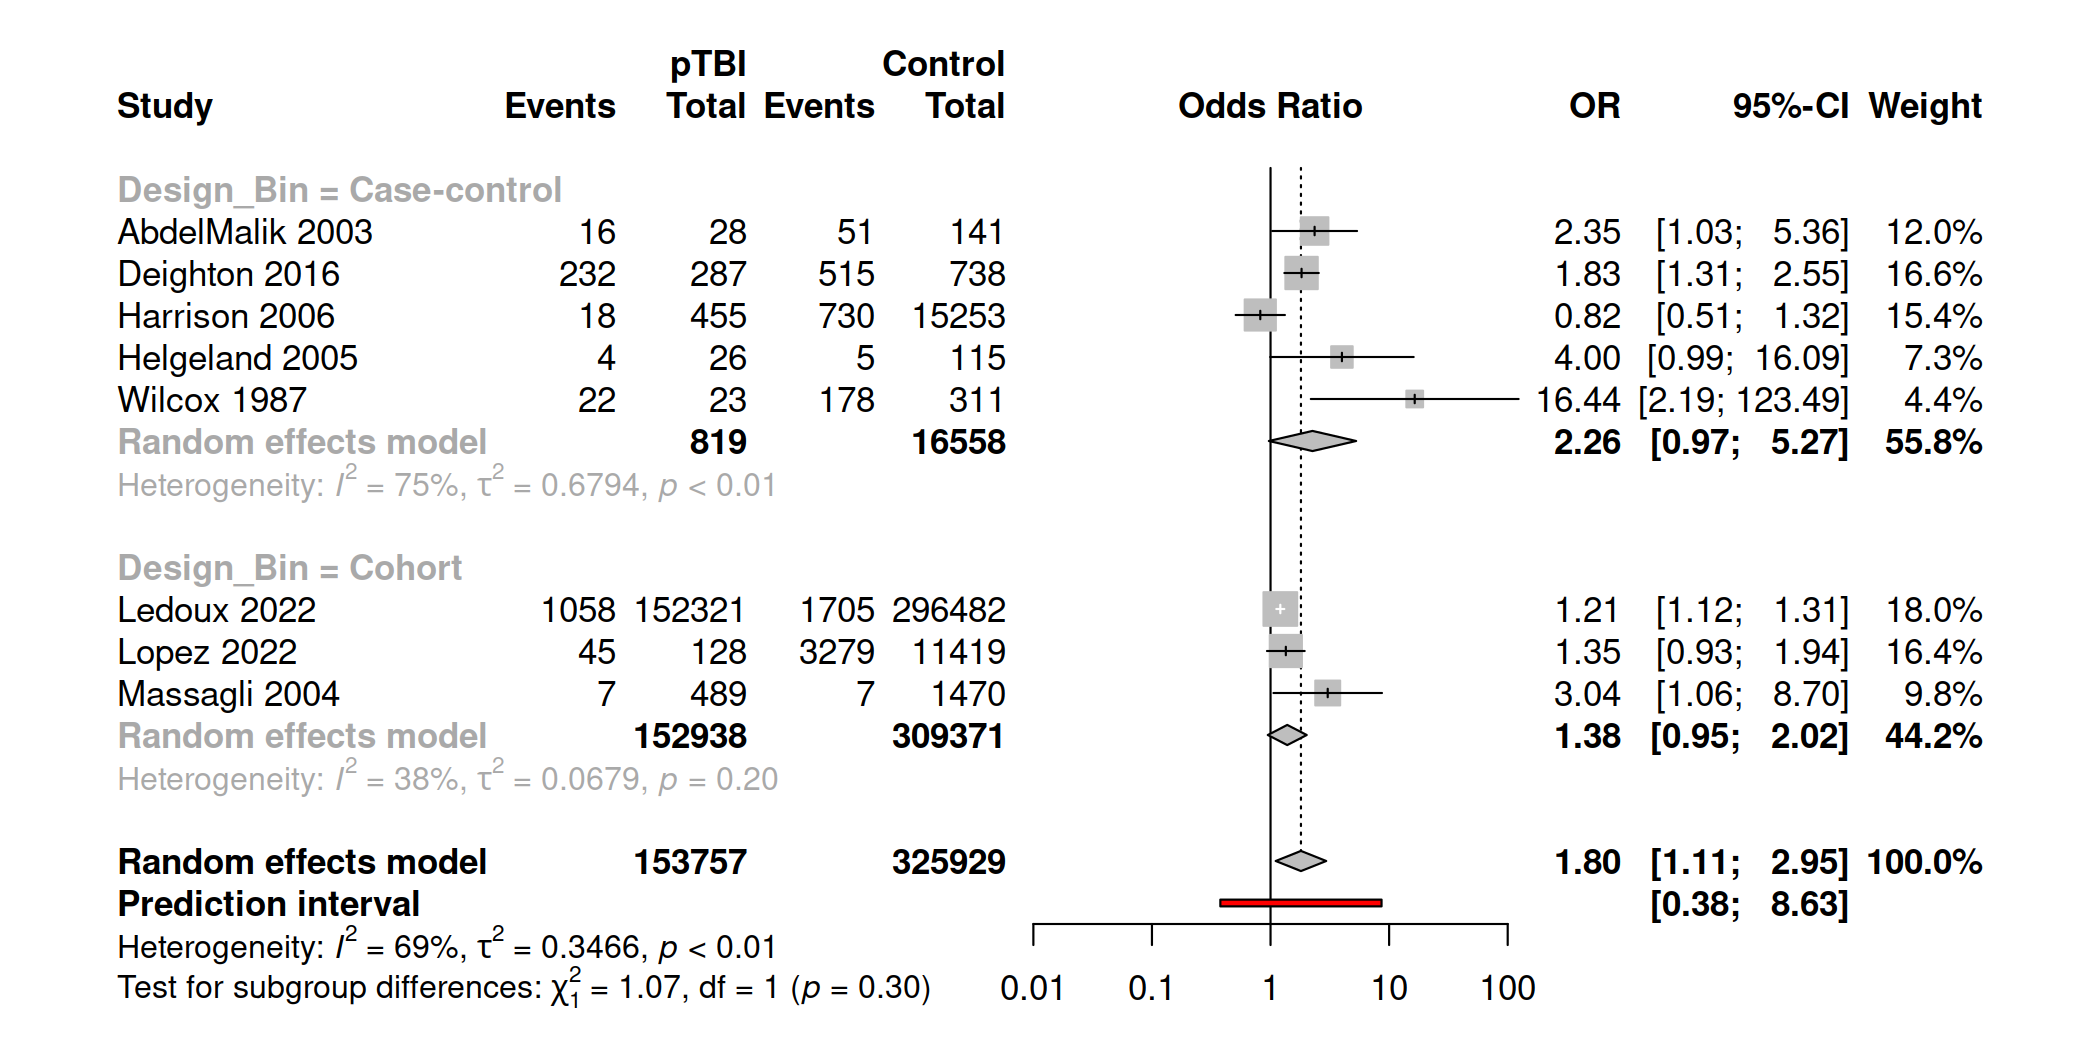

In [58]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_design)

#### Subgroup analysis for psychotic disorder vs sub-threshold symptoms

In [59]:
pTBI_psychosis_meta_outcome <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                       studlab = Study, 
                                       label.e = "pTBI", label.c = "Control",
                                       fixed = FALSE, random = TRUE,
                                       method.tau = "PM", prediction = TRUE,
                                       incr = 0.1, sm = "OR",
                                       subgroup = Outcome_Bin,
                                       data = pTBI_psychosis_meta_df)

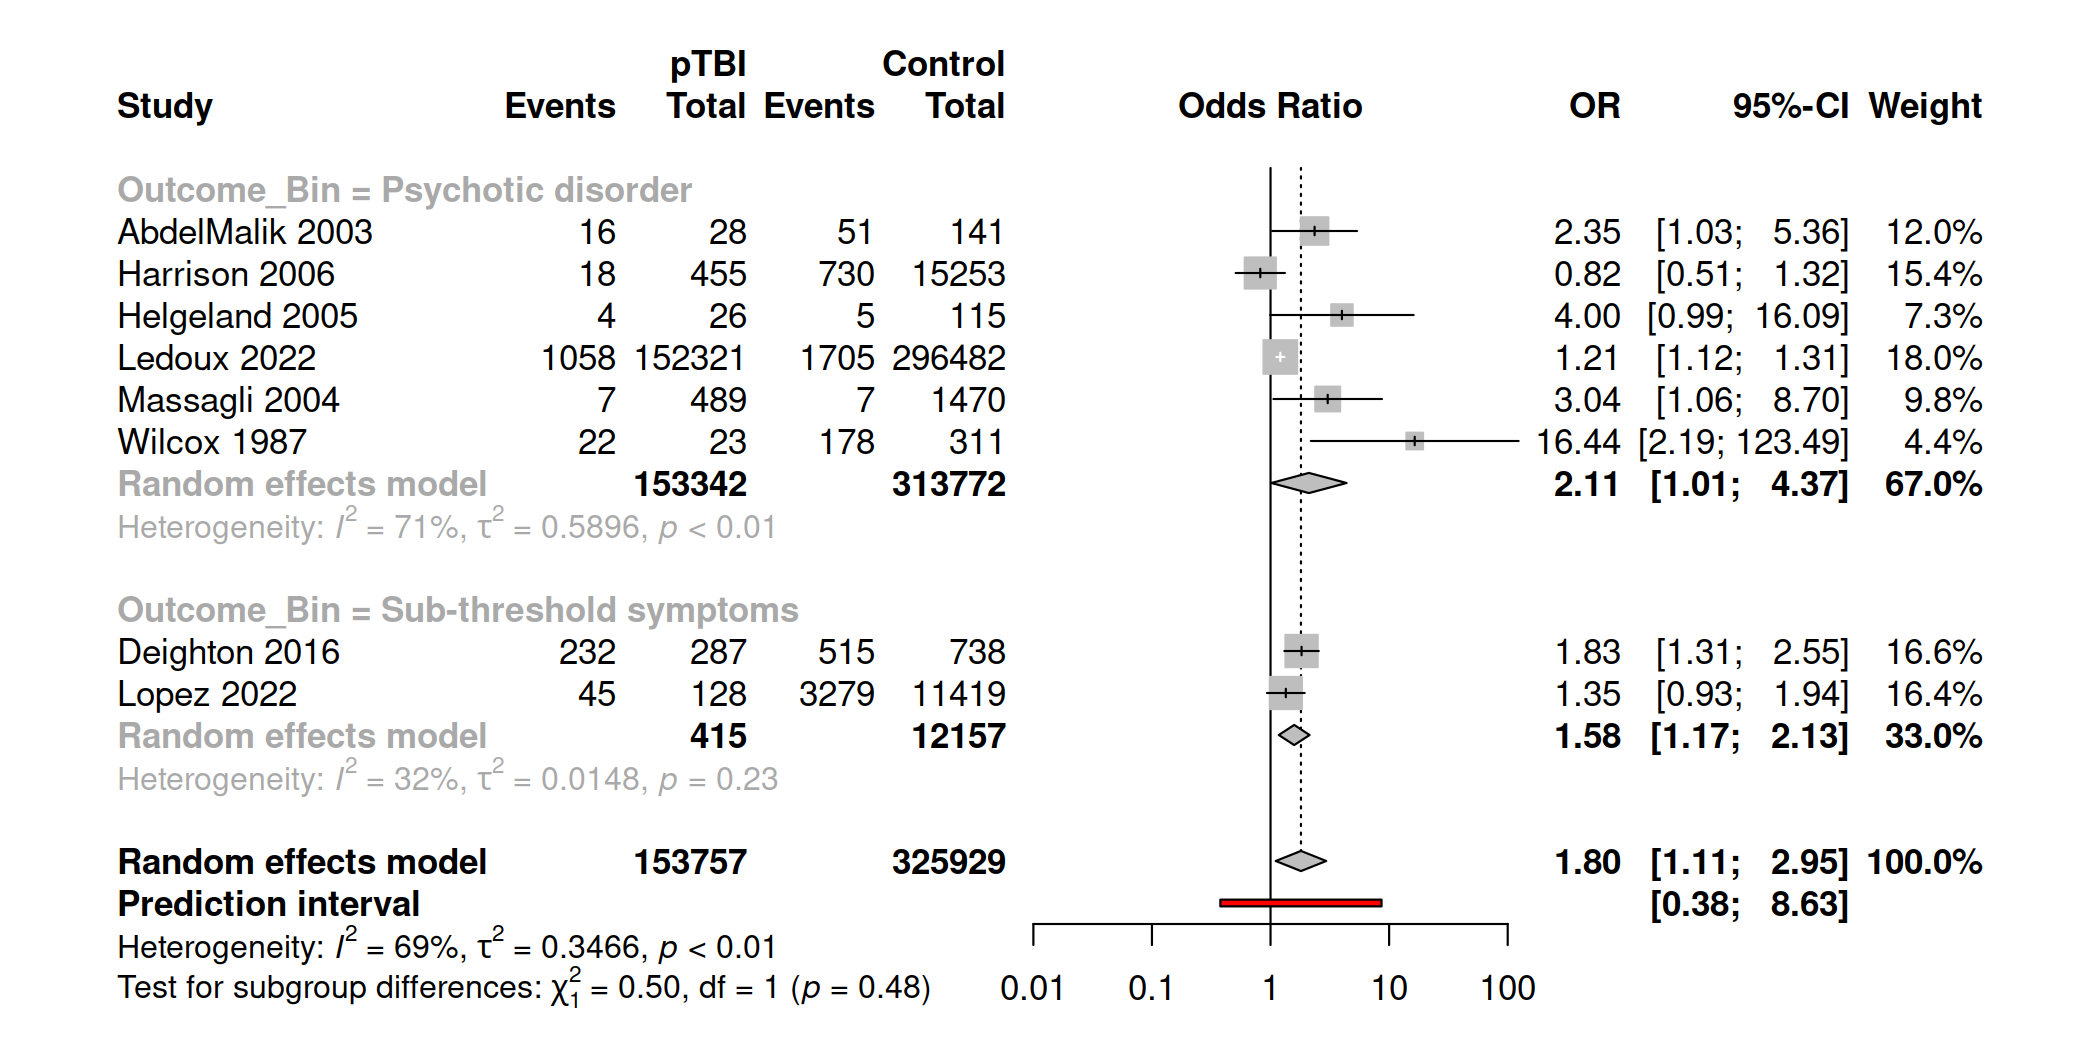

In [60]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_outcome)

#### Subgroup analysis for outcome measure of study

In [61]:
pTBI_psychosis_meta_measure <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                       studlab = Study, 
                                       label.e = "pTBI", label.c = "Control",
                                       fixed = FALSE, random = TRUE,
                                       method.tau = "PM", prediction = TRUE,
                                       incr = 0.1, sm = "OR",
                                       subgroup = OutcomeMeasure_Bin,
                                       data = pTBI_psychosis_meta_df)

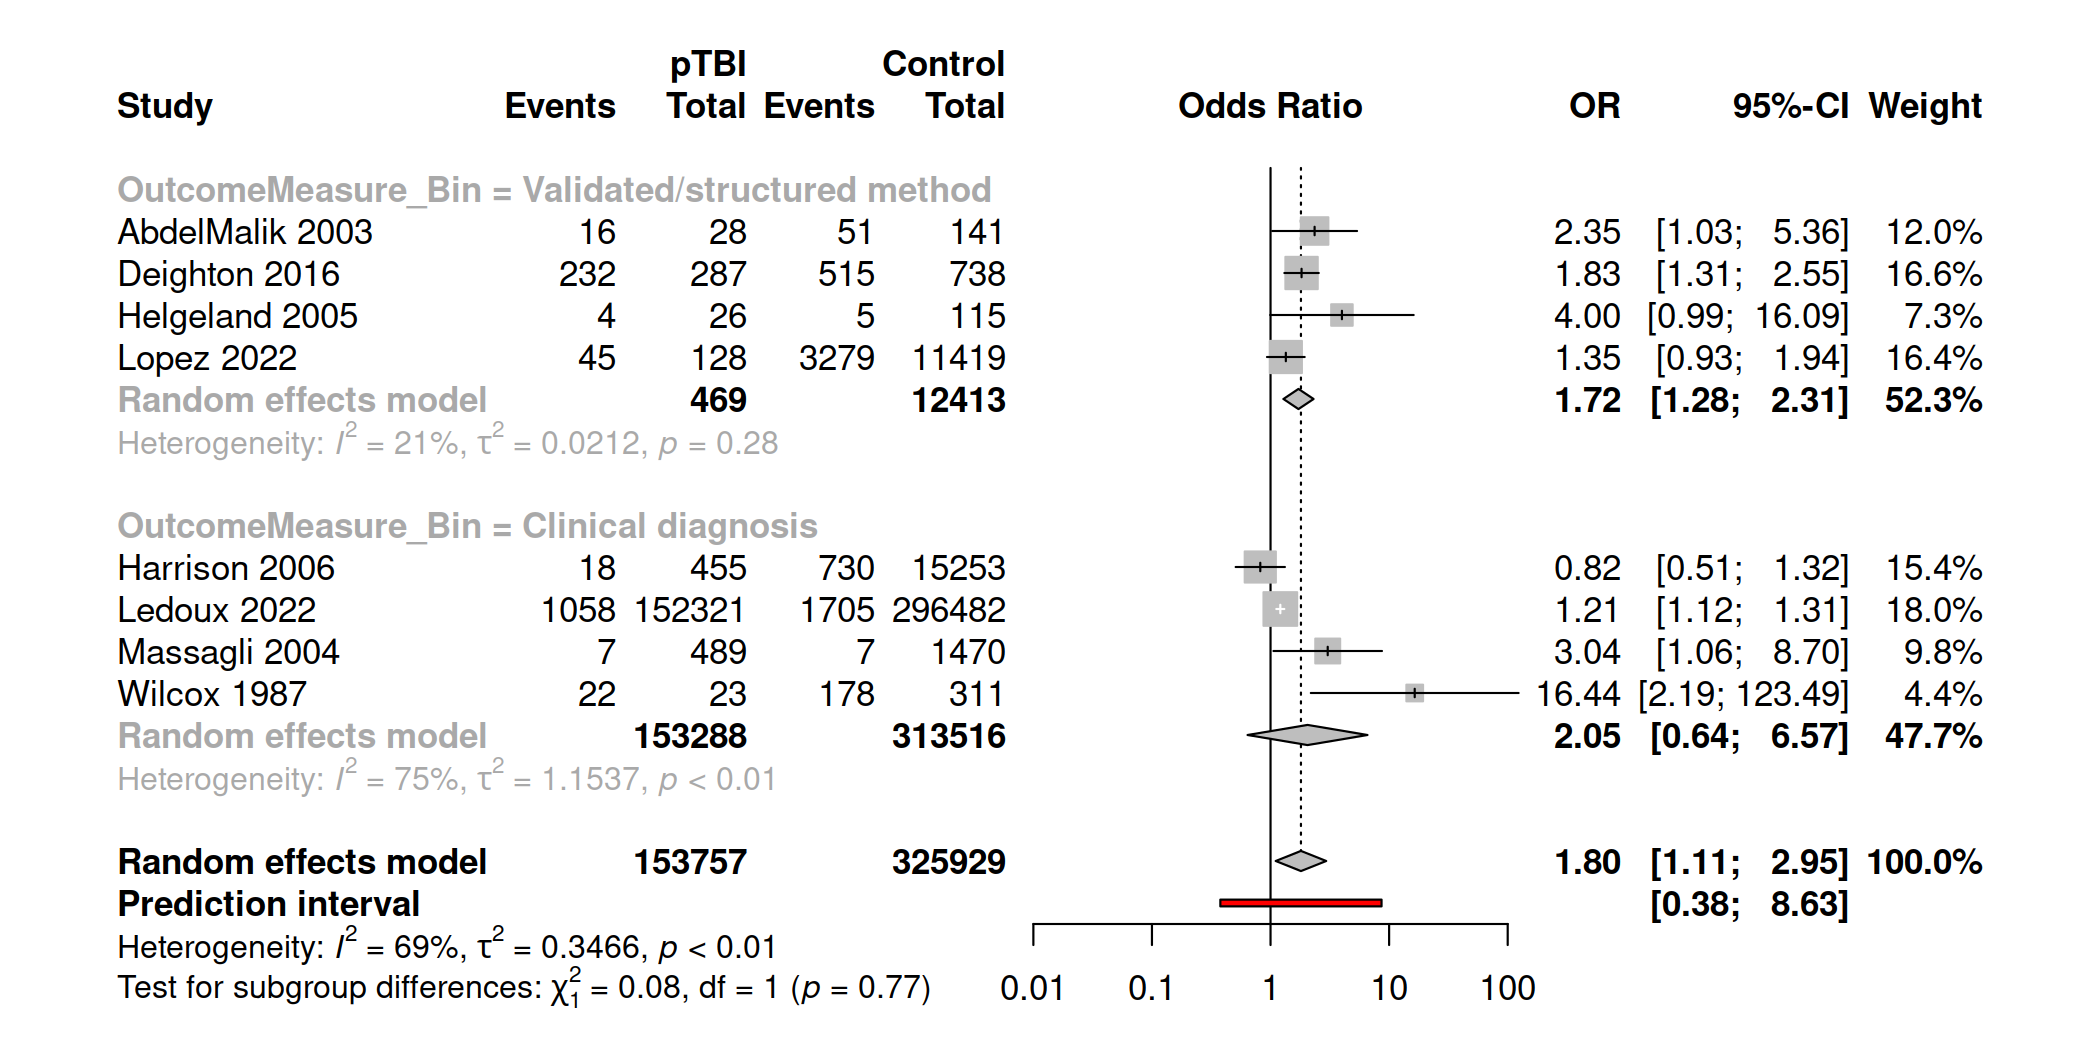

In [62]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_measure)

#### Subgroup analysis for adult / pre-adult onset outcome

In [63]:
# Calculate meta-analysis of odds ratios - Time_Onset_Outcome subgroup
pTBI_psychosis_meta_onset <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                             studlab = Study, 
                             label.e = "pTBI", label.c = "Control",
                             fixed = FALSE, random = TRUE,
                             method.tau = "PM", prediction = TRUE,
                             incr = 0.1, sm = "OR",
                             subgroup = Time_Onset_Outcome,
                             data = pTBI_psychosis_meta_df)

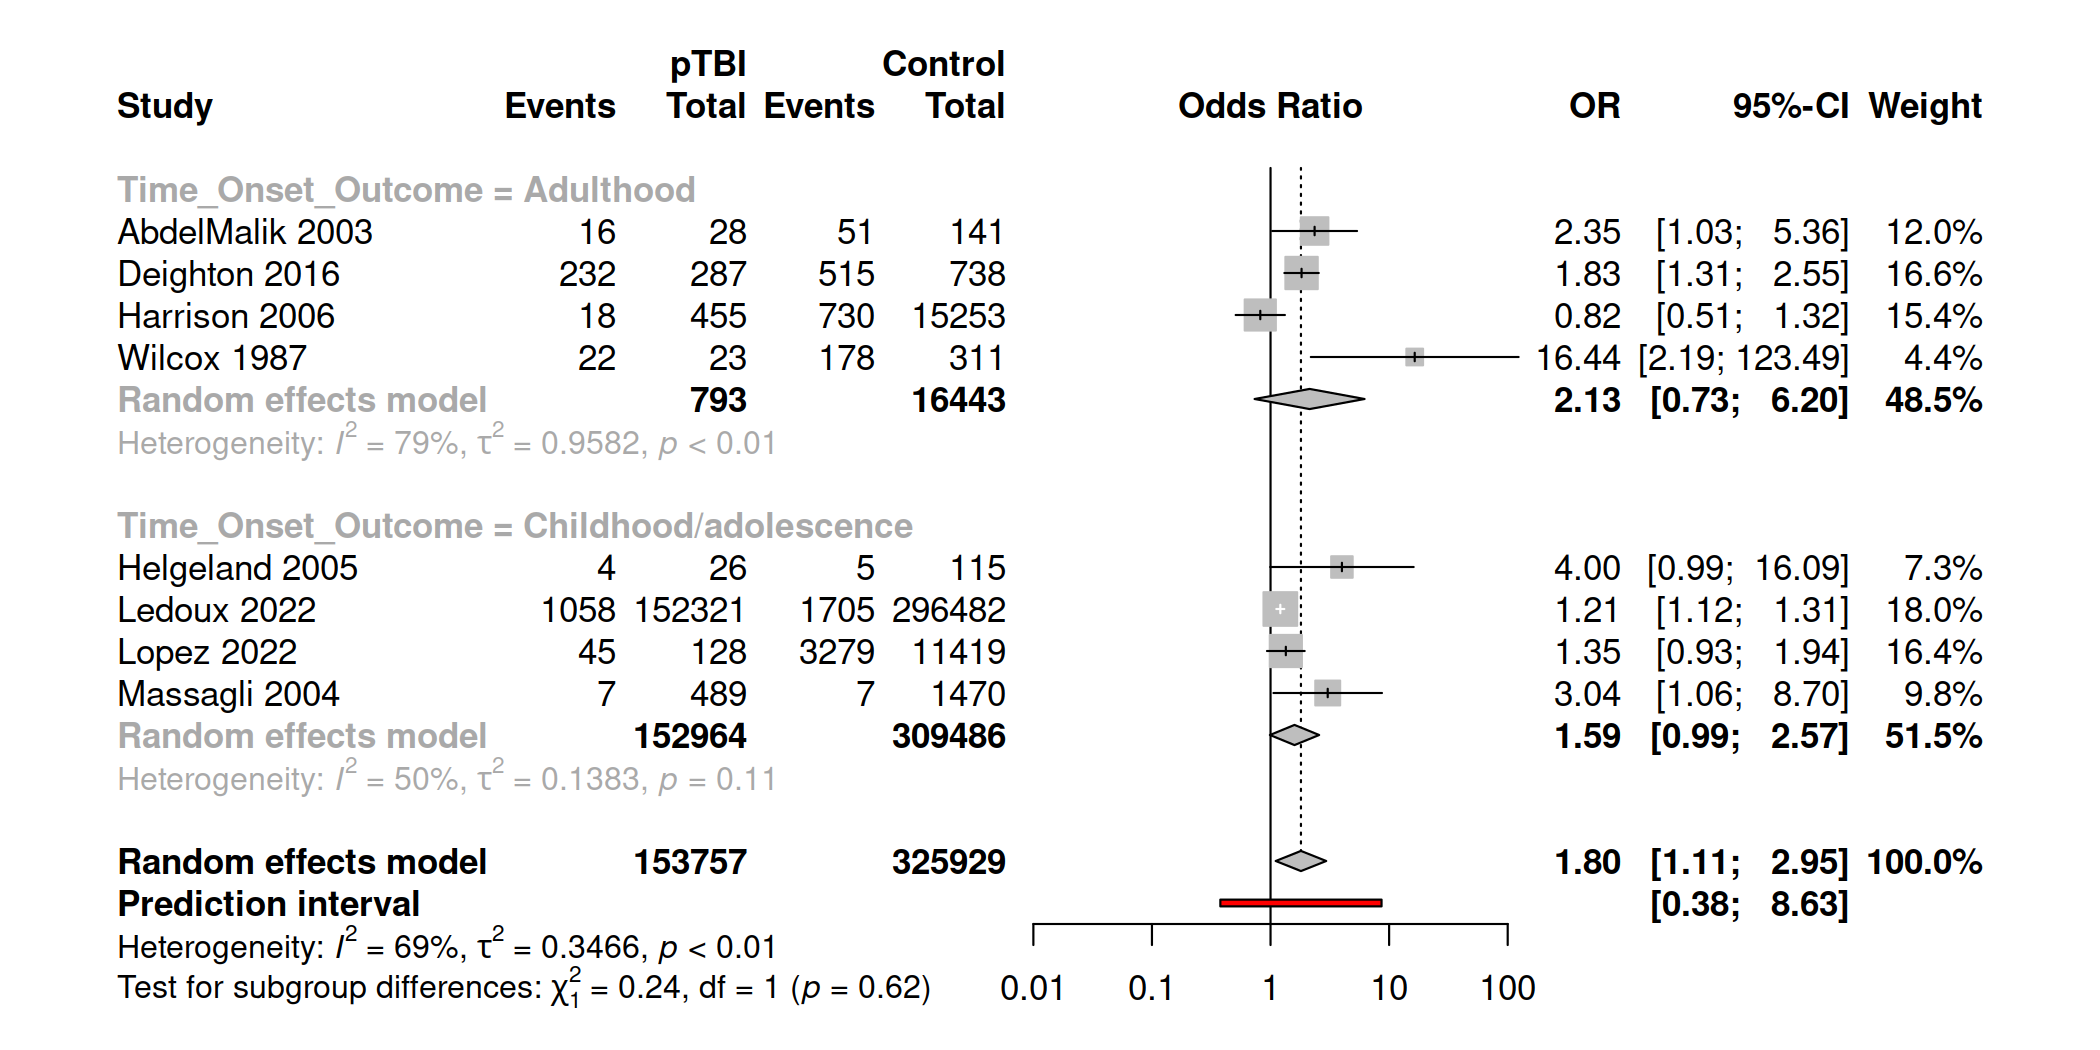

In [64]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 210)
forest(pTBI_psychosis_meta_onset)

### Robustness and sensitivity analyses

Funnel plot

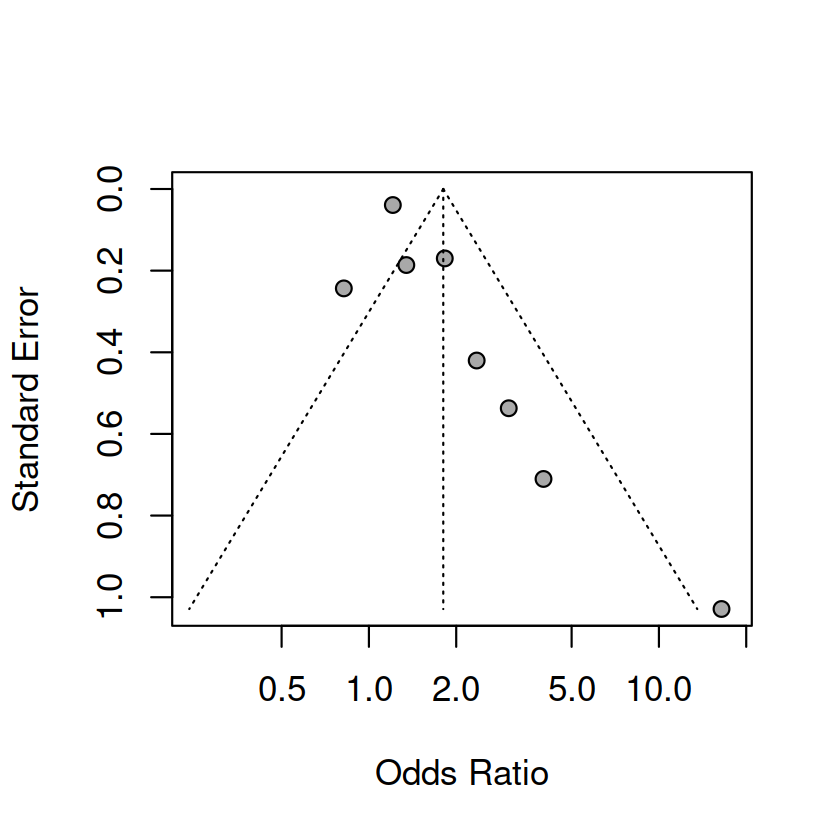

In [65]:
# Set image size and funnel plot
options(repr.plot.width=4, repr.plot.height=4)
funnel(pTBI_psychosis_meta_overall)

Egger's test for funnel plot asymmetry

In [66]:
metabias(pTBI_psychosis_meta_overall, method.bias="linreg")

Warning message:
“Number of studies (k=8) too small to test for small study effects (k.min=10). Change argument 'k.min' if appropriate.”


In [67]:
metabias(pTBI_psychosis_meta_overall, method.bias="linreg", k.min = 8)

Linear regression test of funnel plot asymmetry

Test result: t = 2.42, df = 6, p-value = 0.0519

Sample estimates:
   bias se.bias intercept se.intercept
 1.5063  0.6225    0.1240       0.0647

Details:
- multiplicative residual heterogeneity variance (tau^2 = 1.9225)
- predictor: standard error
- weight:    inverse variance
- reference: Egger et al. (1997), BMJ

#### Are any studies outliers? (No)

In [68]:
dmetar::find.outliers(pTBI_psychosis_meta_overall)

No outliers detected (random-effects model).

#### Are there any studies that have a large impact on the pooled effect or heterogeneity? (Yes, Wilcox 1987)

Calculate influence diagnostics

In [69]:
pTBI_psychosis_meta_overall_inf <- dmetar::InfluenceAnalysis(pTBI_psychosis_meta_overall, random = TRUE)

[===========================================================================] DONE 


Plot externally standardized residuals, Cook’s distance, tau-squared, hat value

Identify any values in red that are identified as excessively influential by Viechtbauer and Cheung (2010) algorithm

Wilcox 1987 is identified as excessively influential and the results of the leave-one-out sensitivity analysis with this study removed are below.

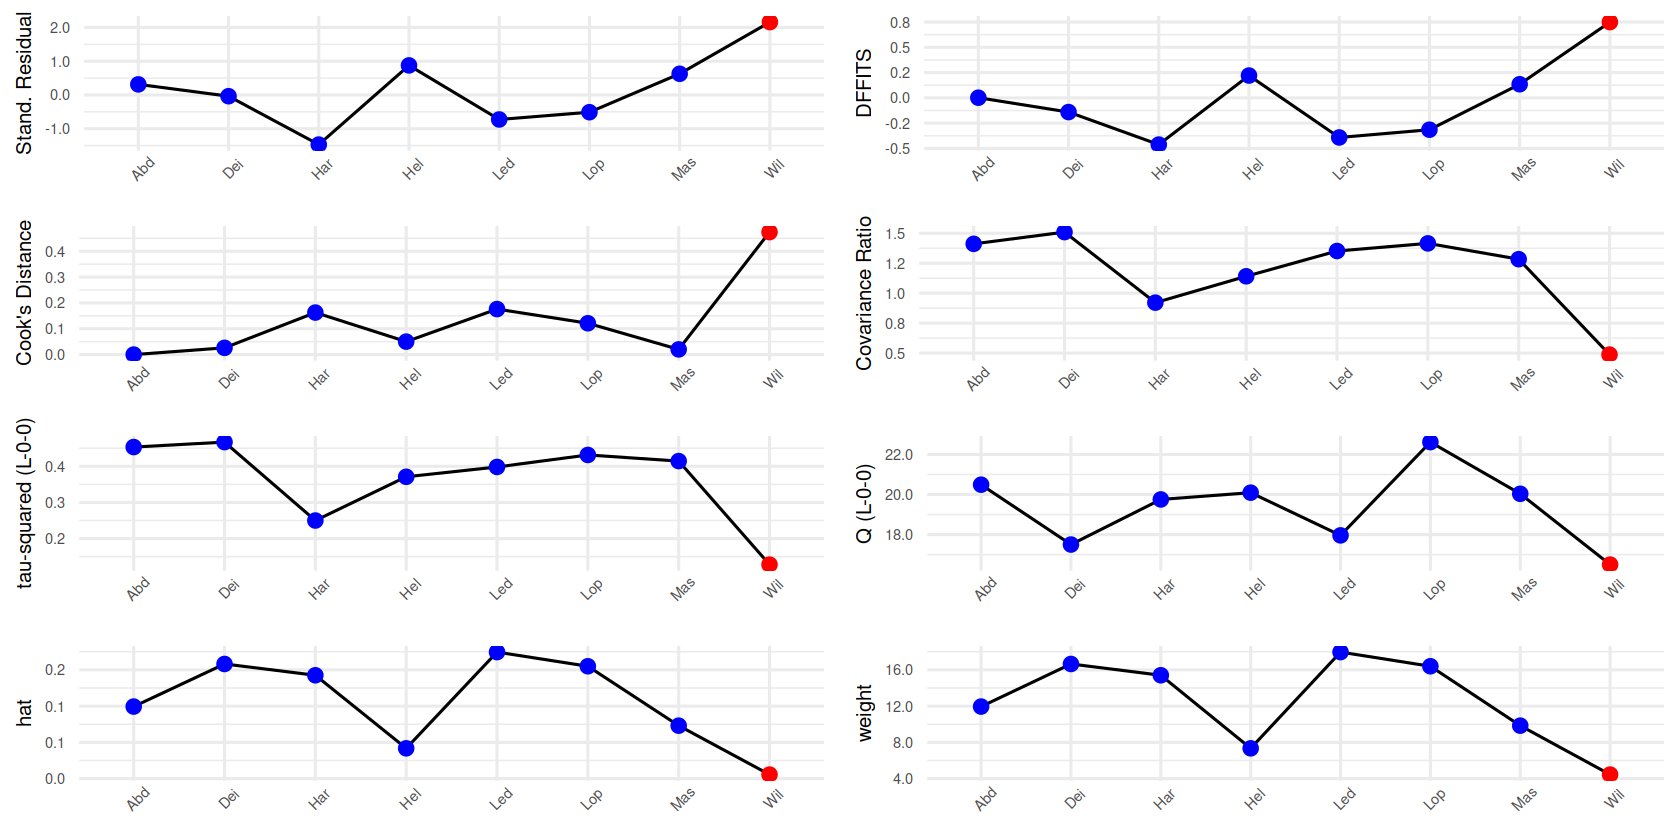

In [70]:
options(repr.plot.width=8, repr.plot.height=4)
plot(pTBI_psychosis_meta_overall_inf, "influence")

#### Leave one out sensitivity analysis shows the association remains in all cases except one: the association becomes marginally non-significant when Massagli 2004 is ommitted, although overall estimate changes little.

In [71]:
metainf(pTBI_psychosis_meta_overall, pooled = "random")

Influential analysis (random effects model)

                               OR           95%-CI p-value   tau^2     tau
Omitting AbdelMalik 2003   1.8040 [1.0078; 3.2295]  0.0470  0.4532  0.6732
Omitting Deighton 2016     1.8791 [1.0290; 3.4315]  0.0401  0.4668  0.6833
Omitting Harrison 2006     1.9962 [1.2472; 3.1949]  0.0040  0.2500  0.5000
Omitting Helgeland 2005    1.7065 [1.0110; 2.8804]  0.0454  0.3710  0.6091
Omitting Ledoux 2022       2.0044 [1.1337; 3.5438]  0.0168  0.3981  0.6310
Omitting Lopez 2022        1.9689 [1.0989; 3.5276]  0.0228  0.4313  0.6567
Omitting Massagli 2004     1.7419 [0.9997; 3.0352]  0.0501  0.4143  0.6437
Omitting Wilcox 1987       1.5193 [1.0791; 2.1391]  0.0166  0.1281  0.3579
                                                                          
Pooled estimate            1.8047 [1.1056; 2.9461]  0.0182  0.3466  0.5887
                              I^2
Omitting AbdelMalik 2003    70.7%
Omitting Deighton 2016      65.7%
Omitting Harrison 2006      

#### Meta-regression: does the quality of evidence summary score predict the results? (Yes, weakly)

In [72]:
metareg(pTBI_psychosis_meta_overall, ~ QualitySumScore)


Mixed-Effects Model (k = 8; tau^2 estimator: PM)

tau^2 (estimated amount of residual heterogeneity):     0.0403 (SE = 0.0640)
tau (square root of estimated tau^2 value):             0.2007
I^2 (residual heterogeneity / unaccounted variability): 45.23%
H^2 (unaccounted variability / sampling variability):   1.83
R^2 (amount of heterogeneity accounted for):            88.38%

Test for Residual Heterogeneity:
QE(df = 6) = 8.7602, p-val = 0.1875

Test of Moderators (coefficient 2):
QM(df = 1) = 8.8914, p-val = 0.0029

Model Results:

                 estimate      se     zval    pval    ci.lb    ci.ub      
intrcpt            3.6937  1.1165   3.3082  0.0009   1.5053   5.8820  *** 
QualitySumScore   -0.0369  0.0124  -2.9819  0.0029  -0.0612  -0.0127   ** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Given that that there is a significant but weak association with study quality rating, does the association between pTBI and psychosis change when low quality studies are removed?

#### (Yes, from OR = 1.80 to OR = 1.43. However, CIs still do not cross zero and are more tightly clustered around estimate)

In [73]:
# Remove rows with low study quality for sensitivity analysis
pTBI_psychosis_meta_minus_lowqual <- pTBI_psychosis_meta_df %>%
  filter(!(Quality == "Low"))

In [74]:
# Re-run meta without sub-groups for sensitivity analysis
pTBI_psychosis_meta_sensitivity_qual <- metabin(Exposure_Events, Exposure_N, Control_Events, Control_N,
                                                studlab = Study, 
                                                label.e = "pTBI", label.c = "Control",
                                                fixed = FALSE, random = TRUE,
                                                method.tau = "PM", prediction = TRUE,
                                                incr = 0.1, sm = "OR",
                                                data = pTBI_psychosis_meta_minus_lowqual)

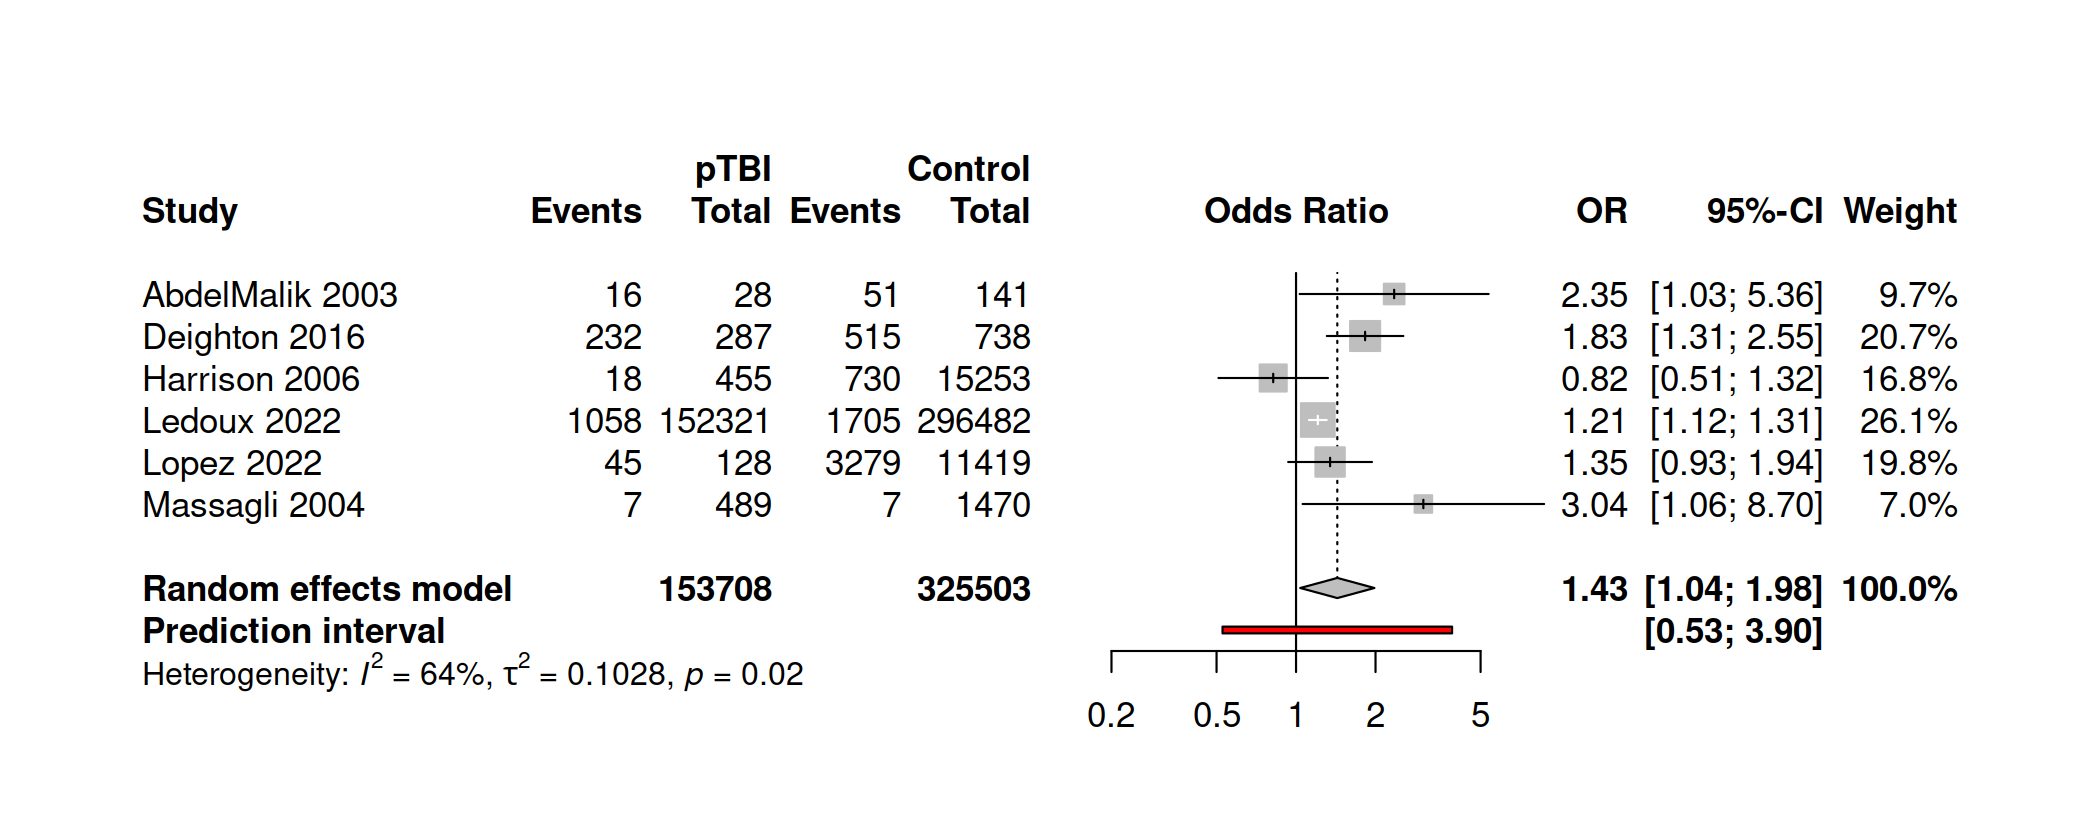

In [75]:
# Set image size and forest plot
options(repr.plot.width=10, repr.plot.height=4, repr.plot.res = 210)
forest(pTBI_psychosis_meta_sensitivity_qual)

### Analysis platform details and software versions

In [76]:
version

               _                                          
platform       x86_64-pc-linux-gnu                        
arch           x86_64                                     
os             linux-gnu                                  
system         x86_64, linux-gnu                          
status         Patched                                    
major          4                                          
minor          2.2                                        
year           2022                                       
month          11                                         
day            10                                         
svn rev        83330                                      
language       R                                          
version.string R version 4.2.2 Patched (2022-11-10 r83330)
nickname       Innocent and Trusting                      

In [77]:
packageVersion("dplyr")

[1] ‘1.1.2’

In [78]:
packageVersion("meta")

[1] ‘6.2.1’

In [79]:
packageVersion("dmetar")

[1] ‘0.0.9000’